In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.optimize import curve_fit

"""
lattice = np.loadtxt("../output2/final_config.txt")
lattice2 = np.loadtxt("../output2/final_config2.txt")
lattice[lattice>=1] = 1
lattice2[lattice2>=1] = 1
#lattice2[lattice2==-1] = -1
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
data = [lattice,lattice2]
for ax,l in zip(axs,data):
    img=ax.imshow(l, interpolation='none')
    fig.colorbar(img,ax=ax)
"""

'\nlattice = np.loadtxt("../output2/final_config.txt")\nlattice2 = np.loadtxt("../output2/final_config2.txt")\nlattice[lattice>=1] = 1\nlattice2[lattice2>=1] = 1\n#lattice2[lattice2==-1] = -1\nfig, axs = plt.subplots(nrows=2,ncols=1,figsize=(10,10))\ndata = [lattice,lattice2]\nfor ax,l in zip(axs,data):\n    img=ax.imshow(l, interpolation=\'none\')\n    fig.colorbar(img,ax=ax)\n'

In [ ]:
data = np.loadtxt("../output2/n_islands_vs_gamma.txt")

In [ ]:
x = np.log(data[:,0])
y = np.log(data[:,1])
fnc = lambda x,p0,p1: p0+p1*x
popt, pcov = curve_fit(fnc, x, y)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y)
ax.plot(x, fnc(x,*popt), label=f"p0 = {popt[0].round(3)}  p1 = {popt[1].round(3)}")
ax.legend(loc="upper right")

In [13]:
fr = np.loadtxt("../output2/fractal.txt")
fr[fr>=1]=1

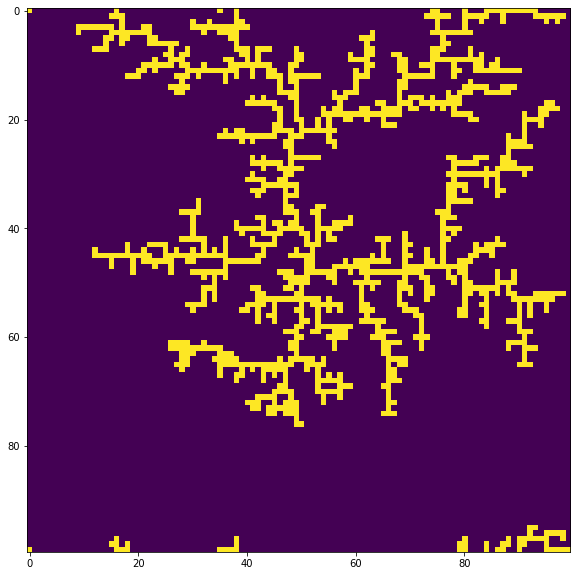

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(fr)

In [ ]:
def m_R(data,r):
    m = 0
    size = data.shape[0]
    for i in range(size):
        for j in range(size):
            if ((i-size/2)**2 + (j-size/2)**2 <= r*r):
                if data[i,j] != -1:
                    m += 1
                    data[i,j] = -1
    return m

rvals = np.arange(1,int(0.3*fr.shape[0]))
mvals = []
while(r<=0.3*fr.shape[0]):
    
    r+=1
